# Imports

In [1]:
%load_ext autoreload
%autoreload 2

# Pandas and numpy
import pandas as pd
import numpy as np

# Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from src.visualization.visualize import plot_corr_matrix, plot_multi, plot_norm_dist

# Alpaca API
import alpaca_trade_api as tradeapi

# Pickle
import pickle
import os

# To load variables from .env file into system environment
from dotenv import find_dotenv, load_dotenv

from atomm.Indicators import MomentumIndicators
from atomm.DataManager.main import MSDataManager
from src.visualization.visualize import plot_confusion_matrix

In [2]:
# Load environment variables
load_dotenv(find_dotenv())

True

In [3]:
# Load dataset from pickle file
data_base_dir = os.environ.get('DATA_DIR_BASE_PATH')
fname = data_base_dir + '/processed/djia_cleaned_2019-12-11.pkl'
djia = pickle.load(open(fname, 'rb'))

In [5]:
#MomentumIndicators(MSDataManager().ReturnData('AAPL', limit=100)['Close']).calcMACD(12, 26,)

# Target variables - Next day close

In [6]:
djia.columns.get_level_values(0).unique()

Index(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DOW', 'GS', 'HD',
       'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
       'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA', 'WMT', 'XOM',
       'DJIA'],
      dtype='object')

In [7]:
dicti = {}
for x in djia.columns.get_level_values(0).unique():
    for n in range(1, 5):
        diff = (djia[x]['Close'].shift(-n) - djia[x]['Close'])
        signal = np.where(diff > 0, 1, 0)
        dicti[x+'_signal'+str(n)] = signal

In [8]:
signals_true = pd.DataFrame(dicti)[['AAPL_signal'+str(x) for x in range(1, 5)]]

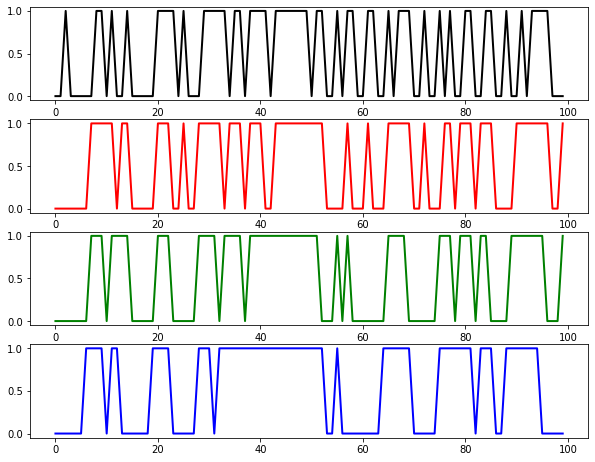

In [9]:
plt.figure(figsize=(10, 10))
colors = ['black', 'red', 'green', 'blue']
for n in range(1, 5):
    plt.subplot(5, 1, n)
    plt.plot(signals_true['AAPL_signal'+str(n)][:100], lw=2, color=colors[n-1])
plt.show()


In [10]:
y = signals_true[['AAPL_signal4']][10:]

In [11]:
y.head()

,AAPL_signal4
10,0
11,1
12,1
13,0
14,0


In [12]:
y.reset_index(inplace=True)

# Feature Engineering

In [63]:
def calcIndicators(data, symbol):
    mi = MomentumIndicators(data[symbol])
    df = pd.DataFrame(index=data.index)
    # MACD1
    df[symbol+'_macd1'] = mi.calcMACD(12, 26)
    # MACD2
    df[symbol+'_macd2'] = mi.calcMACD(9, 20)
    # MACD3 
    df[symbol+'_macd3'] = mi.calcMACD(6, 14)

    # RSI1
    df[symbol+'_rsi1'] = mi.calcRSI(10)
    # RSI2
    df[symbol+'_rsi2'] = mi.calcRSI(8)
    # RSI3
    df[symbol+'_rsi3'] = mi.calcRSI(6)
    
    # STOC1
    df[symbol+'_stoc1'] = mi.calcSTOC(10)
    # STOC2
    df[symbol+'_stoc2'] = mi.calcSTOC(8)
    # STOC3
    df[symbol+'_stoc3'] = mi.calcSTOC(6)
    
    # ROC1
    df[symbol+'_roc1'] = mi.calcROC(10)
    # ROC1
    df[symbol+'_roc2'] = mi.calcROC(8)
    # ROC1 
    df[symbol+'_roc3'] = mi.calcROC(6)
    
    # Bollinger Bands
    # BB1
    df[symbol+'_bb1_upper'], df[symbol+'_bb1_lower'] = mi.calcBB(20)
    
    return df


In [64]:
X = calcIndicators(djia, 'AAPL')

/Users/robin/Documents/temp/atomm/src/atomm/Indicators.py:93: FutureWarning:

Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning



In [65]:
X.head()

,AAPL_macd1,AAPL_macd2,AAPL_macd3,AAPL_rsi1,AAPL_rsi2,AAPL_rsi3,AAPL_stoc1,AAPL_stoc2,AAPL_stoc3,AAPL_roc1,AAPL_roc2,AAPL_roc3,AAPL_bb1_upper,AAPL_bb1_lower
Epoch,,,,,,,,,,,,,,
2014-12-04 00:00:00+00:00,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-05 00:00:00+00:00,-0.039088,-0.051333,-0.074666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-08 00:00:00+00:00,-0.276675,-0.359892,-0.514234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-09 00:00:00+00:00,-0.322457,-0.396183,-0.504662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-10 00:00:00+00:00,-0.527757,-0.642239,-0.810179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
X.dropna(inplace=True)

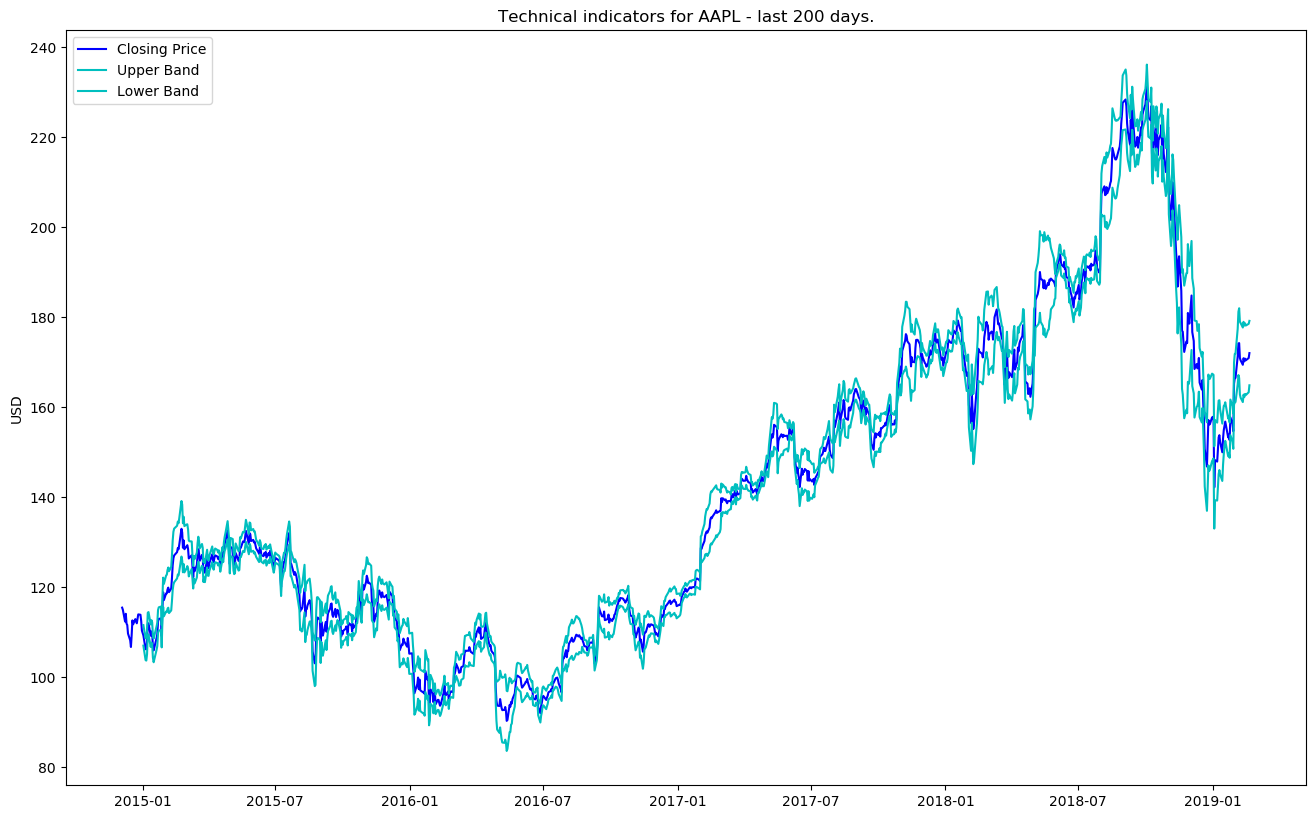

In [81]:
symbol = 'AAPL'

x_ = range(3, X.shape[0])
x_ = list(X.index)

last_days = 200

#plt.fill_between()
plt.figure(figsize=(16, 10), dpi=100)
#plt.plot(dataset['ma7'], label='MA 7', color='g',linestyle='--')
plt.plot(djia[symbol]['Close'][:-last_days], label='Closing Price', color='b')
#plt.plot(X[symbol+'_macd1'],label='MACD 12, 26', color='r',linestyle='--')
plt.plot(X[symbol+'_bb1_upper'][:-last_days], label='Upper Band', color='c')
plt.plot(X[symbol+'_bb1_lower'][:-last_days], label='Lower Band', color='c')
plt.fill_between(X.index[:-last_days], X[symbol+'_bb1_lower'][:-last_days], X[symbol+'_bb1_lower'][:-last_days], alpha=0.35)
plt.title(f'Technical indicators for {symbol} - last {last_days} days.')
plt.ylabel('USD')
plt.legend()

In [16]:
#sns.pairplot(X.fillna(0))

## Scaling the features

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [43]:
scale = MinMaxScaler()
scale = StandardScaler()

In [44]:
scaled = scale.fit_transform(X)

In [45]:
scaled.shape

(1249, 12)

In [46]:
X_scaled = pd.DataFrame(data=scaled, columns=X.columns)
#X_scaled = X

In [47]:
X_scaled.describe()

,AAPL_macd1,AAPL_macd2,AAPL_macd3,AAPL_rsi1,AAPL_rsi2,AAPL_rsi3,AAPL_stoc1,AAPL_stoc2,AAPL_stoc3,AAPL_roc1,AAPL_roc2,AAPL_roc3
count,1.249000e+03,1249.000000,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03,1.249000e+03
mean,2.275557e-17,0.000000,-2.844447e-17,6.257782e-17,-2.730669e-16,1.820446e-16,1.991113e-17,-6.257782e-17,-2.560002e-17,5.688893e-18,5.688893e-18,8.533340e-18
std,1.000401e+00,1.000401,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00,1.000401e+00
min,-3.858537e+00,-4.120314,-4.394093e+00,-2.621480e+00,-2.443091e+00,-2.170183e+00,-1.550771e+00,-1.488463e+00,-1.412843e+00,-3.716106e+00,-3.646270e+00,-3.442847e+00
25%,-4.839040e-01,-0.490307,-5.142726e-01,-7.276100e-01,-7.318527e-01,-7.530104e-01,-9.927371e-01,-1.014049e+00,-1.108519e+00,-5.887315e-01,-5.714726e-01,-5.601826e-01
50%,5.236191e-02,0.056250,8.245922e-02,2.866840e-02,2.227947e-02,3.763626e-02,2.668443e-01,2.221523e-01,2.277517e-01,8.238551e-02,5.339986e-02,5.057112e-02
75%,6.125424e-01,0.638424,5.977331e-01,7.770995e-01,7.632262e-01,8.214208e-01,1.068074e+00,1.072603e+00,1.059940e+00,6.175318e-01,6.049279e-01,5.981738e-01
max,2.617292e+00,2.536155,2.437421e+00,2.042280e+00,1.946607e+00,1.738600e+00,1.074672e+00,1.072603e+00,1.059940e+00,3.142789e+00,3.416403e+00,3.656447e+00


## Building a first classification model

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, TimeSeriesSplit

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y['AAPL_signal4'], test_size=.3, random_state=101)

In [50]:
TimeSeriesSplit
X_train, X_test, y_train, y_test = (X.values, y['AAPL_signal4'], test_size=.3, random_state=101)

SyntaxError: invalid syntax (<ipython-input-50-484b8c0ea546>, line 2)

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
y_pred = rf.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42       168
           1       0.58      0.71      0.64       207

    accuracy                           0.55       375
   macro avg       0.54      0.54      0.53       375
weighted avg       0.55      0.55      0.54       375



In [55]:
print(confusion_matrix(y_test, y_pred))

[[ 61 107]
 [ 60 147]]
